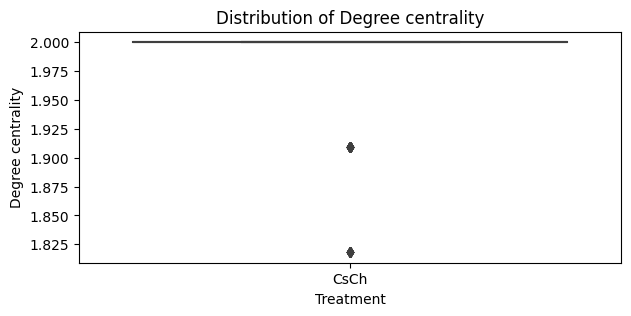

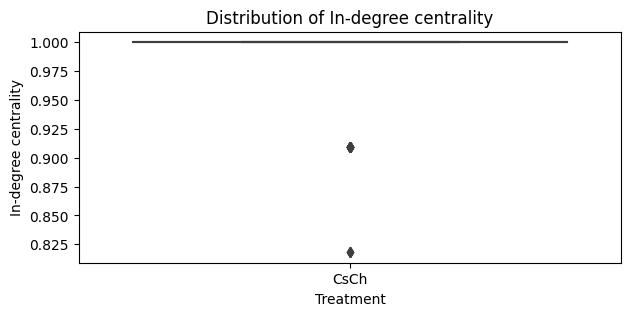

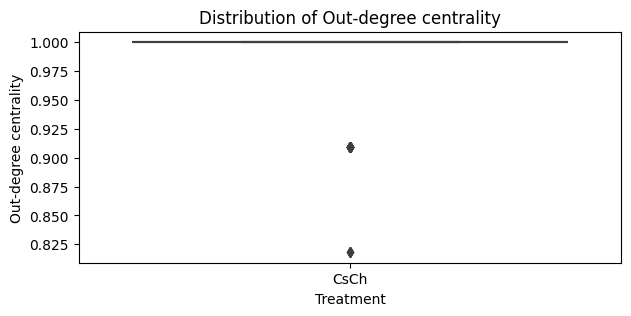

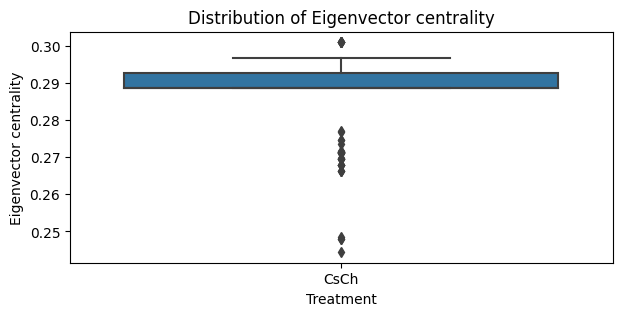

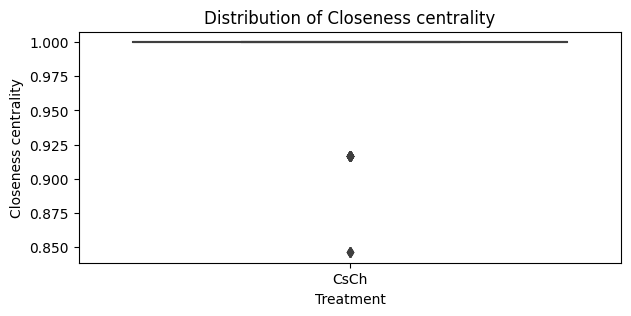

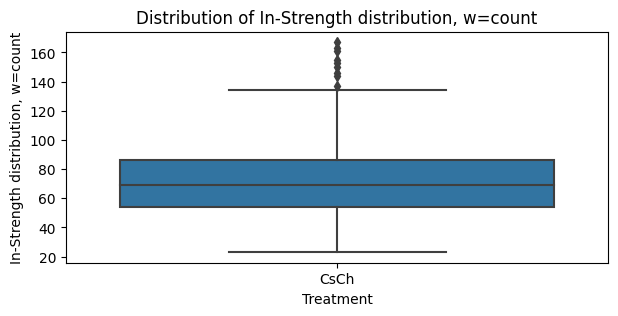

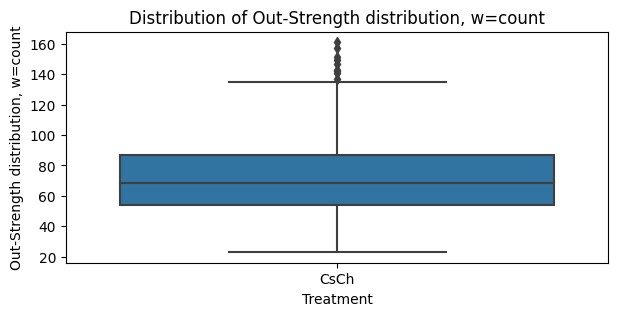

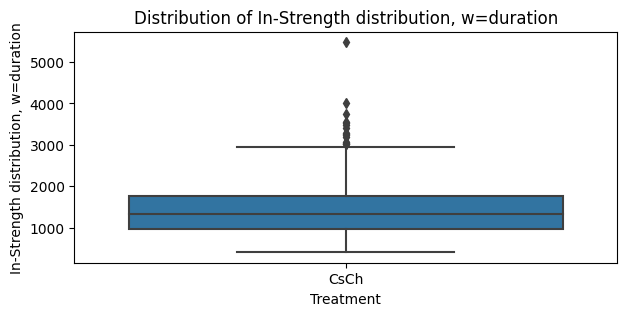

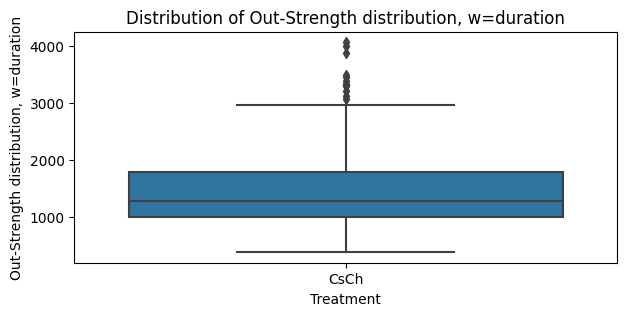

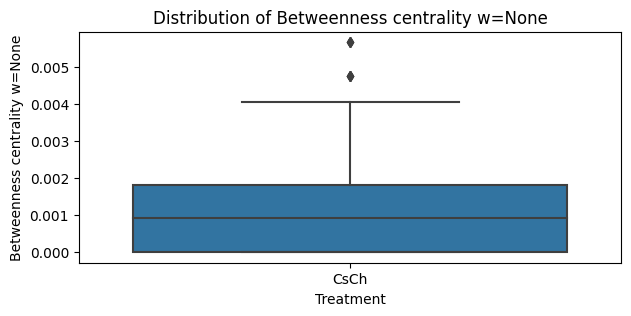

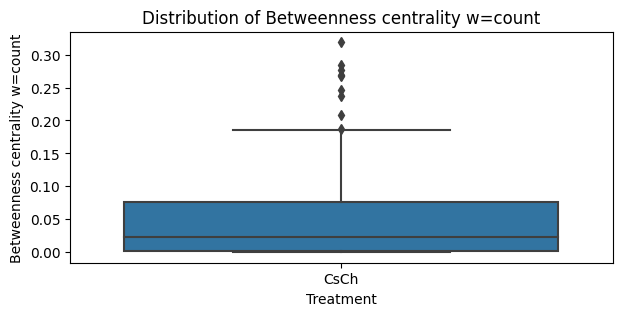

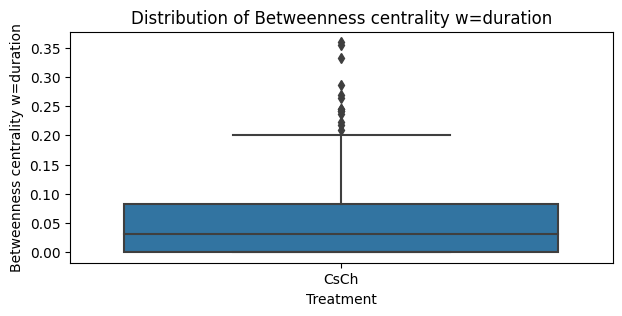

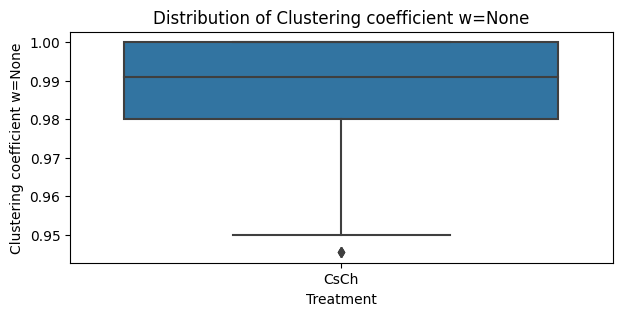

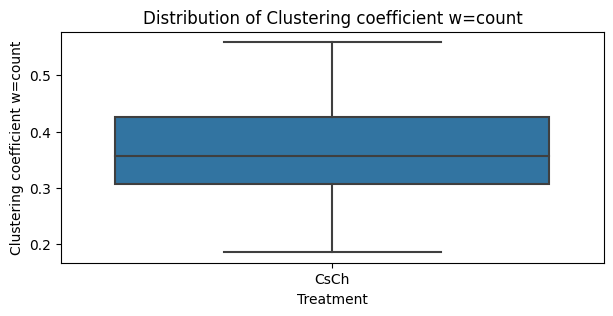

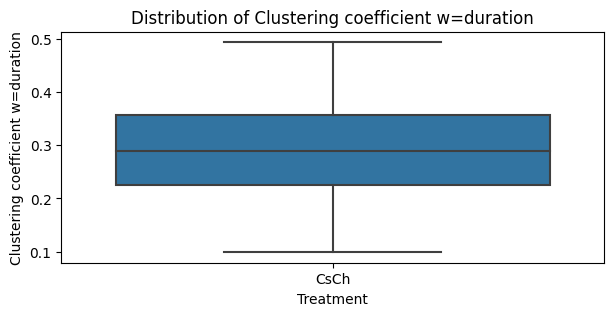

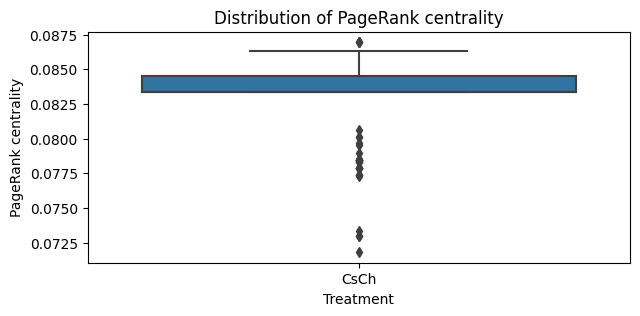

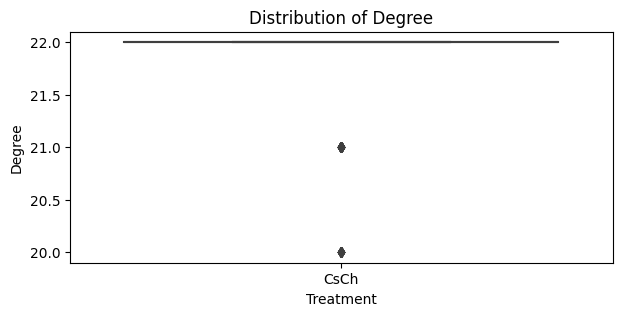

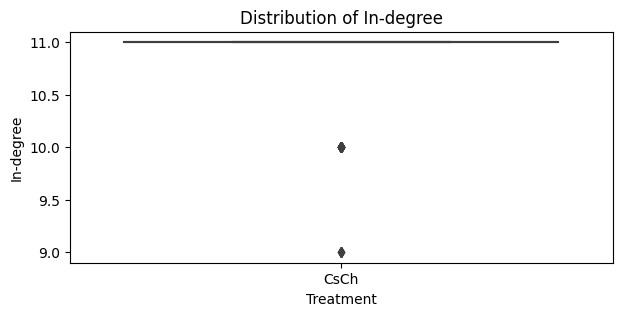

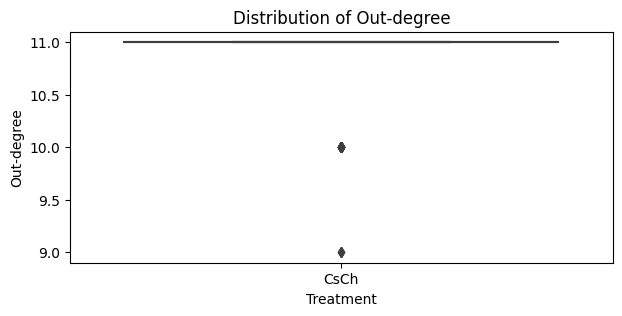

In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
import toml
import pandas as pd
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from src import settings
from src.utils import fileio

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)  
INPUT_PATH = os.path.join(settings.RESULTS_DIR, "local_measures")
all_treatments = fileio.load_multiple_folders(INPUT_PATH)
all_treatments = {key: value for key, value in all_treatments.items() if key in config["TREATMENTS"]}

treatment_dataframes = pd.DataFrame()
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)

    for group_name, group_path in all_groups.items():
        df = pd.read_csv(group_path, index_col=0)
        df.rename_axis("Fly")
        df['Treatment'] = treatment_name
        df['Group'] = group_name.replace(".csv", "")
        treatment_dataframes = pd.concat([treatment_dataframes, df])

treatment_dataframes = treatment_dataframes.set_index('Treatment', append=True)
treatment_dataframes = treatment_dataframes.set_index('Group',append=True)

combined_data_reset = treatment_dataframes.reset_index()
for measure_name in treatment_dataframes.columns:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=combined_data_reset, x="Treatment", y=measure_name)
    plt.xlabel("Treatment")
    plt.ylabel(measure_name)
    plt.title(f'Distribution of {measure_name}')
    plt.show()